<a href="https://colab.research.google.com/github/linusms/Hands-on/blob/main/Kaggle_House_Prices_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

os.getcwd()
house_price=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/House Prices/train.csv')
final_test_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/House Prices/test.csv')
sample_sub=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/House Prices/sample_submission.csv')

자료형에 따라 범주형, 수치형 데이터 나누기

In [92]:
# df.dtypes : 시리즈 반환. 
# house_price의 'object' 자료형인 행들로만 구성된 시리즈의 인덱스 -> 원 데이터프레임에서 object 자료형인 열의 이름

num_col=house_price.dtypes[house_price.dtypes!='object'].index
cat_col=house_price.dtypes[house_price.dtypes=='object'].index

print(num_col)
print(cat_col)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

이상치 탐색 및 제거

In [93]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [94]:
a1=np.percentile(house_price['LowQualFinSF'],25)
a2=np.percentile(house_price['LowQualFinSF'],75)
a3=a2-a1
a4=a3*1.5

print(house_price['LowQualFinSF'].iloc[51])
house_price[(house_price['LowQualFinSF']<a1-a4)| house_price['LowQualFinSF']>a2+a4].index

360


Int64Index([  51,   88,  125,  170,  185,  187,  197,  198,  263,  267,  406,
             589,  635,  729,  829,  831,  868,  873,  883,  945, 1009, 1031,
            1173, 1349, 1364, 1440],
           dtype='int64')

In [95]:
def detect_outlier(df, n, features):
  outlier_indices=[]
  for col in features:
    Q1=np.percentile(df[col],25)
    Q3=np.percentile(df[col],75)
    IQR=Q3-Q1

    outlier_step=1.5*IQR

    # 허용 구간 벗어난 샘플의 인덱스 뽑아냄
    outlier_list_col=df[(df[col]<Q1-outlier_step)| (df[col]>Q3+outlier_step)].index
    # outlier_indices=이상치 인덱스 담는 리스트
    outlier_indices.extend(outlier_list_col)
    print(outlier_indices, col)
  # 각 이상치가 몇 번 나왔는지 딕셔너리 형태로 저장
  outlier_indices=Counter(outlier_indices)
  print(outlier_indices)
  # 다 지우면 너무 많으니 모든 열에서 나온 이상치가 3개 이상 존재하는 행만 제거
  multiple_outliers=list(k for k, v in outlier_indices.items() if v>n)
  print(multiple_outliers)

  return multiple_outliers

In [96]:
Outliers_to_drop=detect_outlier(house_price, 2, ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'])

[9, 48, 56, 75, 87, 93, 115, 125, 145, 165, 172, 180, 193, 195, 225, 227, 232, 235, 243, 246, 285, 291, 300, 312, 335, 344, 348, 363, 411, 430, 432, 434, 472, 488, 489, 490, 500, 504, 520, 535, 578, 599, 603, 614, 623, 635, 637, 649, 655, 675, 685, 687, 703, 705, 713, 755, 758, 829, 831, 837, 861, 914, 915, 956, 959, 962, 969, 971, 975, 985, 1007, 1029, 1030, 1038, 1039, 1062, 1068, 1086, 1088, 1091, 1104, 1144, 1160, 1172, 1186, 1190, 1191, 1219, 1236, 1265, 1266, 1291, 1297, 1304, 1334, 1358, 1364, 1367, 1378, 1393, 1416, 1449, 1452] MSSubClass
[9, 48, 56, 75, 87, 93, 115, 125, 145, 165, 172, 180, 193, 195, 225, 227, 232, 235, 243, 246, 285, 291, 300, 312, 335, 344, 348, 363, 411, 430, 432, 434, 472, 488, 489, 490, 500, 504, 520, 535, 578, 599, 603, 614, 623, 635, 637, 649, 655, 675, 685, 687, 703, 705, 713, 755, 758, 829, 831, 837, 861, 914, 915, 956, 959, 962, 969, 971, 975, 985, 1007, 1029, 1030, 1038, 1039, 1062, 1068, 1086, 1088, 1091, 1104, 1144, 1160, 1172, 1186, 1190, 1191, 1

In [97]:
# 이상치가 대충 어디에 있는지 확인 가능

from google.colab.data_table import DataTable
DataTable.max_columns = 81

house_price.loc[Outliers_to_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
634,635,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
910,911,90,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,154300
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,107500


In [98]:
house_price = house_price.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
house_price.shape

(1338, 81)

결측치 확인

In [100]:
# .isnull() : NaN인지 T/F로 반환. sum하면 True는 1이므로 NaN의 개수의 합 나옴
# NaN이 0개 이상인, 즉 존재하는 열만 반환

for col in house_price.columns:
    if house_price[col].isnull().sum()>0:
      msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (house_price[col].isnull().sum() / house_price[col].shape[0]))
      print(msperc)

column: LotFrontage	 Percent of NaN value: 17.12%
column:      Alley	 Percent of NaN value: 94.10%
column: MasVnrType	 Percent of NaN value: 0.52%
column: MasVnrArea	 Percent of NaN value: 0.52%
column:   BsmtQual	 Percent of NaN value: 2.32%
column:   BsmtCond	 Percent of NaN value: 2.32%
column: BsmtExposure	 Percent of NaN value: 2.39%
column: BsmtFinType1	 Percent of NaN value: 2.32%
column: BsmtFinType2	 Percent of NaN value: 2.39%
column: Electrical	 Percent of NaN value: 0.07%
column: FireplaceQu	 Percent of NaN value: 48.28%
column: GarageType	 Percent of NaN value: 4.86%
column: GarageYrBlt	 Percent of NaN value: 4.86%
column: GarageFinish	 Percent of NaN value: 4.86%
column: GarageQual	 Percent of NaN value: 4.86%
column: GarageCond	 Percent of NaN value: 4.86%
column:     PoolQC	 Percent of NaN value: 99.85%
column:      Fence	 Percent of NaN value: 80.94%
column: MiscFeature	 Percent of NaN value: 97.16%


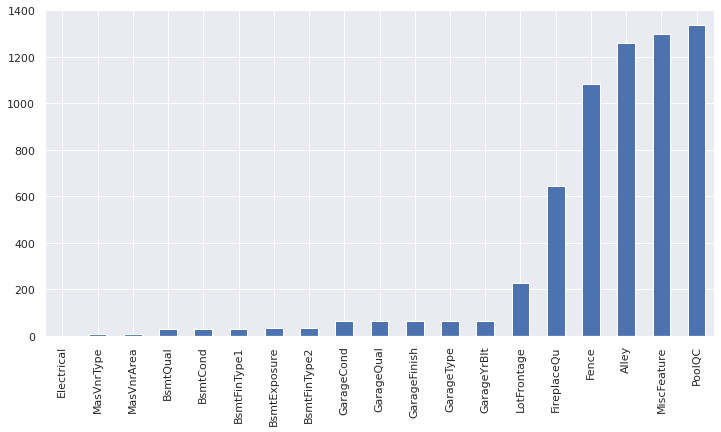

In [101]:
missing = house_price.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (12,6))


In [102]:
# skewness가 크다는 것은 평균보다 많이 큰 값 존재, 작다는 것은 평균보다 많이 작은 값 존재
# 즉 양수면 왼쪽 꼬리, 음수면 오른쪽 꼬리
# kurtosis가 3이면 정규분포, 3 이상이면 더 뾰족, 3 이하면 더 뭉툭 

for col in num_col:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(house_price[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(house_price[col].kurt())  
         )

Id              Skewness: 00.00     Kurtosis: -01.19
MSSubClass      Skewness: 01.37     Kurtosis: 001.49
LotFrontage     Skewness: 01.59     Kurtosis: 013.04
LotArea         Skewness: 07.78     Kurtosis: 123.55
OverallQual     Skewness: 00.16     Kurtosis: -00.05
OverallCond     Skewness: 00.74     Kurtosis: 001.23
YearBuilt       Skewness: -0.58     Kurtosis: -00.60
YearRemodAdd    Skewness: -0.52     Kurtosis: -01.27
MasVnrArea      Skewness: 02.69     Kurtosis: 011.04
BsmtFinSF1      Skewness: 00.65     Kurtosis: -00.50
BsmtFinSF2      Skewness: 04.86     Kurtosis: 026.86
BsmtUnfSF       Skewness: 00.87     Kurtosis: 000.29
TotalBsmtSF     Skewness: 00.29     Kurtosis: 001.17
1stFlrSF        Skewness: 00.66     Kurtosis: 000.02
2ndFlrSF        Skewness: 00.77     Kurtosis: -00.80
LowQualFinSF    Skewness: 12.74     Kurtosis: 170.50
GrLivArea       Skewness: 00.66     Kurtosis: 000.54
BsmtFullBath    Skewness: 00.56     Kurtosis: -00.96
BsmtHalfBath    Skewness: 04.91     Kurtosis: 

EDA - 기억할 것. 이상치 제거하고, 그 후에 EDA. 결측치 채우기는 이후에 데이터전처리에서

상관관계 그래프 그리기 : 주의! 다중 공산성을 감지해야 한다

**다중 공산성이란?**

    회귀 분석에서 사용된 모형의 일부 설명 변수가 다른 설명 변수와 상관 관계가 높은 경우. 
    발생하면 해당되는 변수들 각각의 설명력이 약해짐(표준 오차의 증가)

    표준 오차가 증가하면 t(회귀계수/베타의 표준오차) 값이 작아져서 유의확률이 커짐 -> 귀무가설 채택될 가능성 높아짐

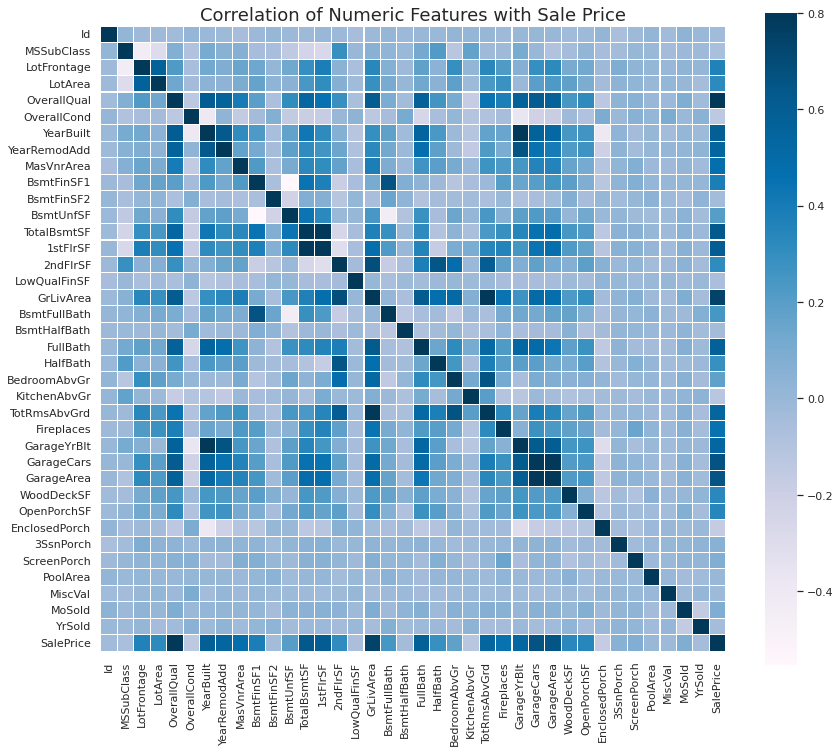

In [103]:
corr_data = house_price[num_col]

colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=18)
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.1,
            cmap = colormap, linecolor = "white", vmax=0.8)

In [104]:
# .nlargest(k, '열') : 데이터프레임의 특정 열에서 값 큰 순서대로 k개 행들만 표시

cols=corr_data.corr().nlargest(11,'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd',
       'YearRemodAdd'],
      dtype='object')


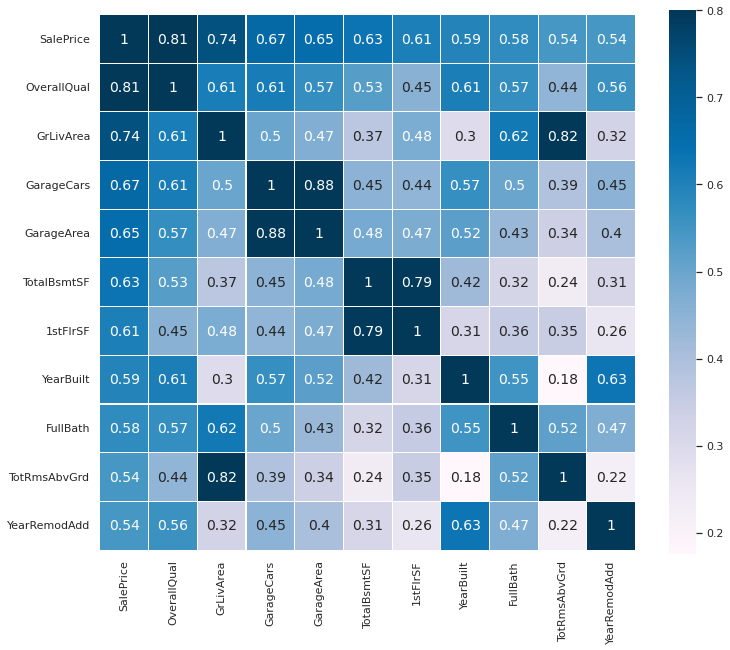

In [106]:
# corrcoef 계산시 반드시 안의 행렬을 Transpose? 
# 기본값 varrow가 한 행을 한 특성으로 인식해서 그런듯.

k= 11
cols = corr_data.corr().nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(house_price[cols].values.T)
f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':14},yticklabels = cols.values)


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd',
       'YearRemodAdd'],
      dtype='object')


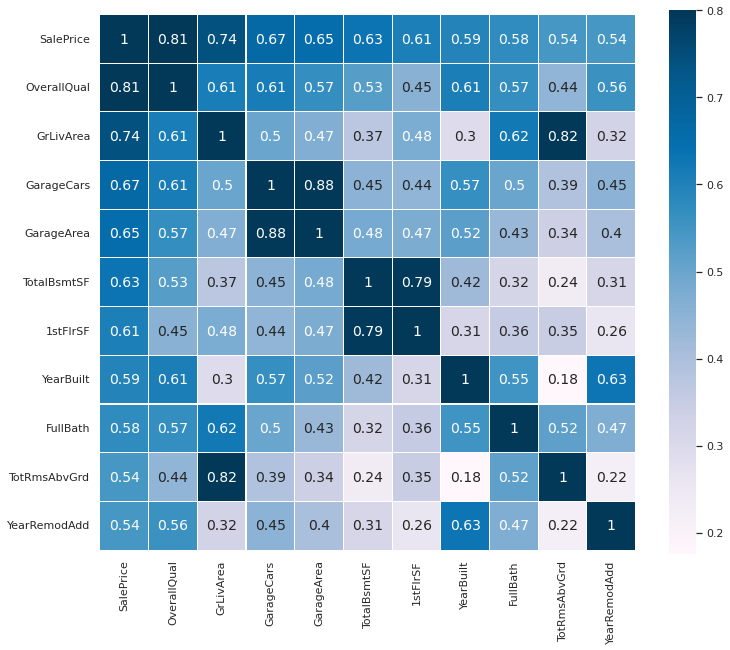

In [107]:
# 사실 corr()로 바꿔도 같은 결과가 나온다

k= 11
cols = corr_data.corr().nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = house_price[cols].corr()
f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':14},yticklabels = cols.values)

서로 관련성이 높아 보이는 GarageCars, GarageArea는 다중 공분산 위험이 있으므로 하나만 선택- SalePrice와 더 관련있는 GarageCars로 선택

1stFlrSF 와 TotalBsmtSF도 마찬가지 이유로 TotalBsmtSF만 선택

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


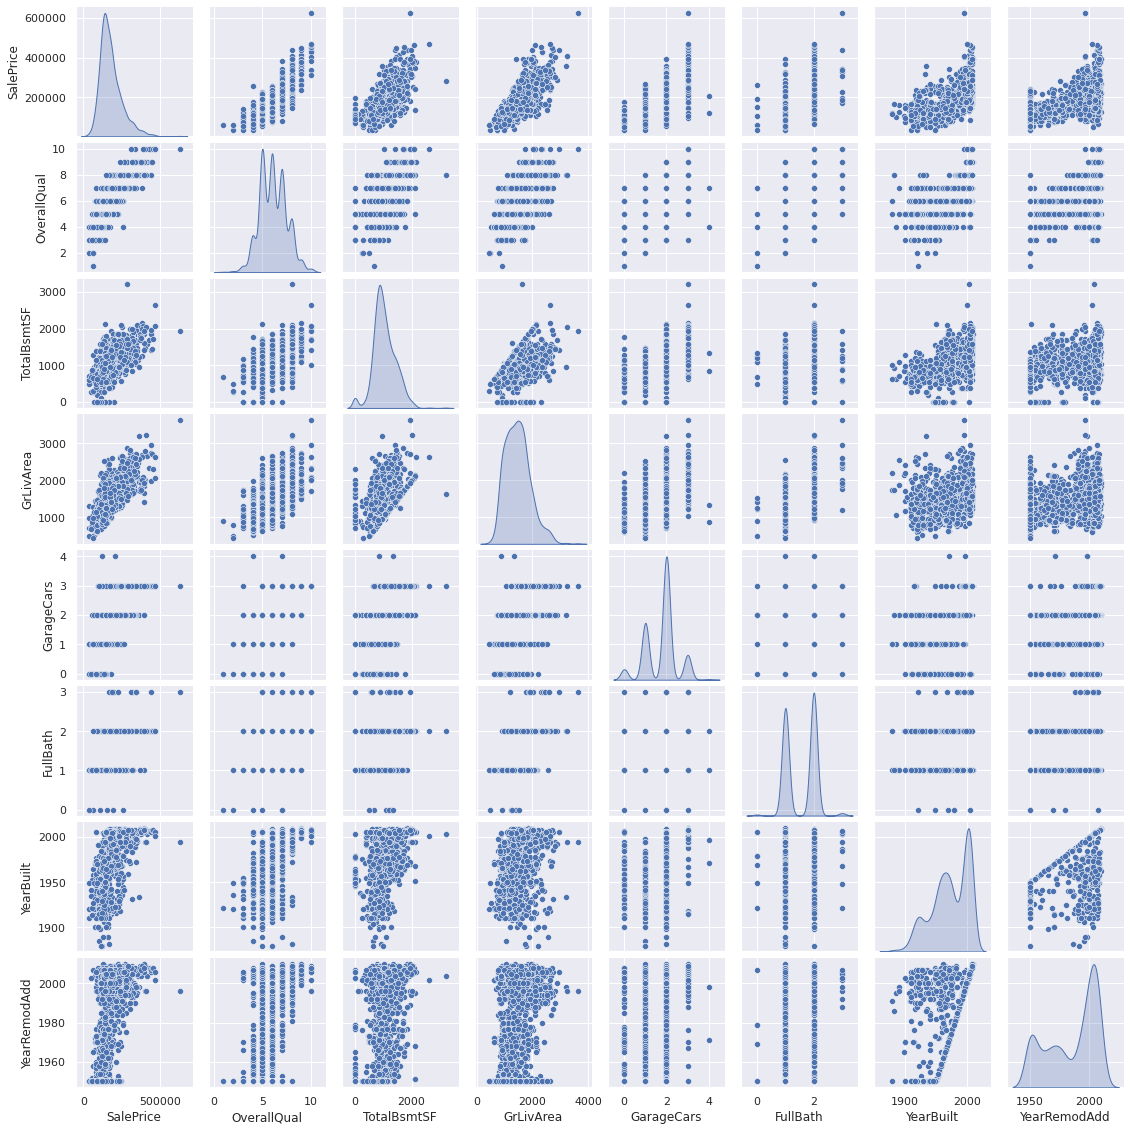

In [108]:
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(house_price[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

# 위의 Zoomed Heat Map에서 다중공선성을 보이는 변수 중 SalePrice와 연관이 덜 한 변수를 제외하고 PairPlot을 그립니다.
# 'TotalBsmtSF'와 'GrLiveArea'는 데이터 설명에서 알 수 있듯이 지하실의 면적과 생활공간 면적을 의미합니다.
# 'TotalBsmtSF'와 'GrLiveArea'의 plot을 보면 점들이 직선처럼 그려지고 대부분의 점은 해당 선 아래에 유지됩니다. 
# 이것은 일반적으로 지하실 면적이 지상 생활 면적과 같을 수 있지만, 더 크진 않기 때문에 보여지는 특징이라고 할 수 있습니다.
# 'SalePrice'와 'YearBuilt'의 plot을 보면 우상향 곡선을 보입니다.
# 이것은 전년도 대비 주택 가격 상승의 가속을 의미한다고 할 수 있습니다.

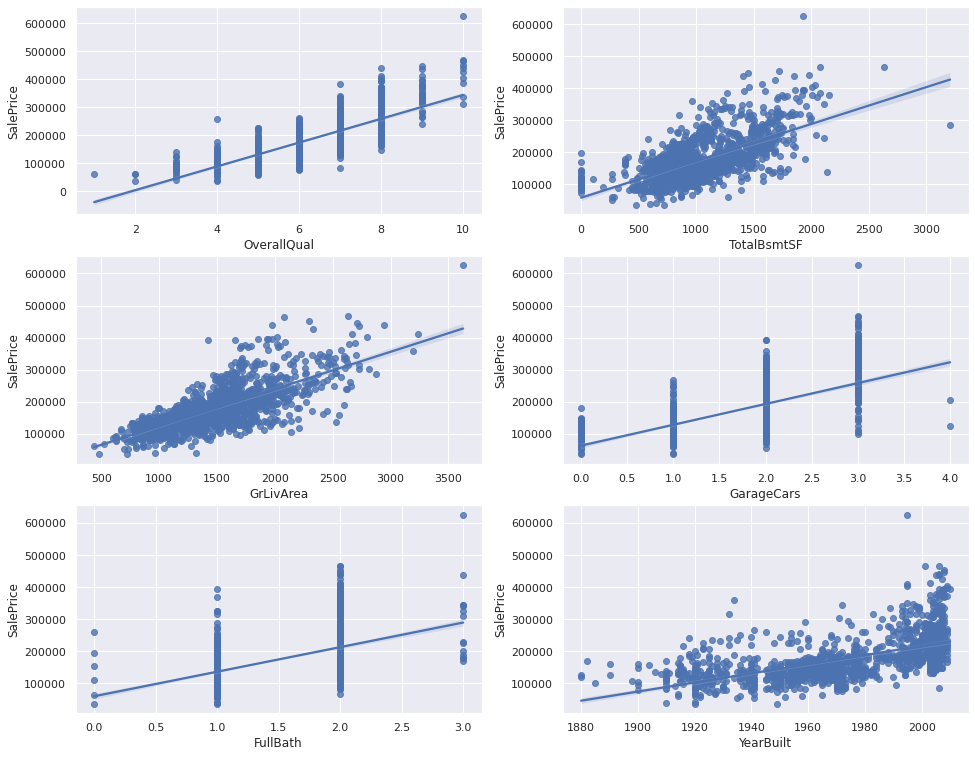

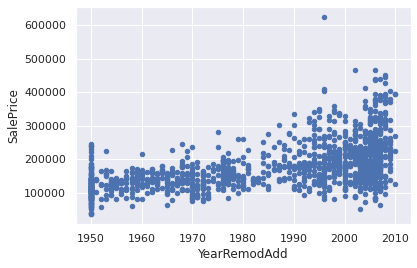

In [109]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16,13))
OverallQual_scatter_plot = pd.concat([house_price['SalePrice'],house_price['OverallQual']],axis = 1)
sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
TotalBsmtSF_scatter_plot = pd.concat([house_price['SalePrice'],house_price['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
GrLivArea_scatter_plot = pd.concat([house_price['SalePrice'],house_price['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
GarageCars_scatter_plot = pd.concat([house_price['SalePrice'],house_price['GarageCars']],axis = 1)
sns.regplot(x='GarageCars',y = 'SalePrice',data = GarageCars_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
FullBath_scatter_plot = pd.concat([house_price['SalePrice'],house_price['FullBath']],axis = 1)
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearBuilt_scatter_plot = pd.concat([house_price['SalePrice'],house_price['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6)
YearRemodAdd_scatter_plot = pd.concat([house_price['SalePrice'],house_price['YearRemodAdd']],axis = 1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')

# Target Feature "SalePrice"와 가장 밀접한 연관이 있다고 판단됐던 변수들의 Scatter Plot을 그립니다.
# OverallQual, GarageCars, Fullbath와 같은 변수들은 실제로는 범주형 데이터의 특징을 보인다고 할 수 있습니다. (등급, 갯수 등을 의미하기 때문)

범주형도 마찬가지. 모든 데이터를 다 전처리하는 것이 아니라 타깃 특성과 관련있어 보이는 특성(클래스당 편차가 큰 것들)만 선정

In [110]:
# 각 열에 어떤 클래스들이 있는지(데이터 설명에 써져 있는 것과 다를 수 있으므로 꼭 확인해야 함)

for catg in list(cat_col) :
    print(house_price[catg].value_counts())
    print('#'*50)
    

RL         1055
RM          197
FV           65
RH           14
C (all)       7
Name: MSZoning, dtype: int64
##################################################
Pave    1335
Grvl       3
Name: Street, dtype: int64
##################################################
Grvl    42
Pave    37
Name: Alley, dtype: int64
##################################################
Reg    859
IR1    440
IR2     32
IR3      7
Name: LotShape, dtype: int64
##################################################
Lvl    1211
Bnk      52
HLS      48
Low      27
Name: LandContour, dtype: int64
##################################################
AllPub    1338
Name: Utilities, dtype: int64
##################################################
Inside     972
Corner     235
CulDSac     81
FR2         46
FR3          4
Name: LotConfig, dtype: int64
##################################################
Gtl    1275
Mod      56
Sev       7
Name: LandSlope, dtype: int64
##################################################
NAmes      20

범주형 데이터 EDA - 클래스별 타겟값 차이가 많이 나는 경우, 

중위값, Q3-Q1만 볼게 아니라 분포(swarmplot, stripplot 등)도 고려(boxplot에서는 점)

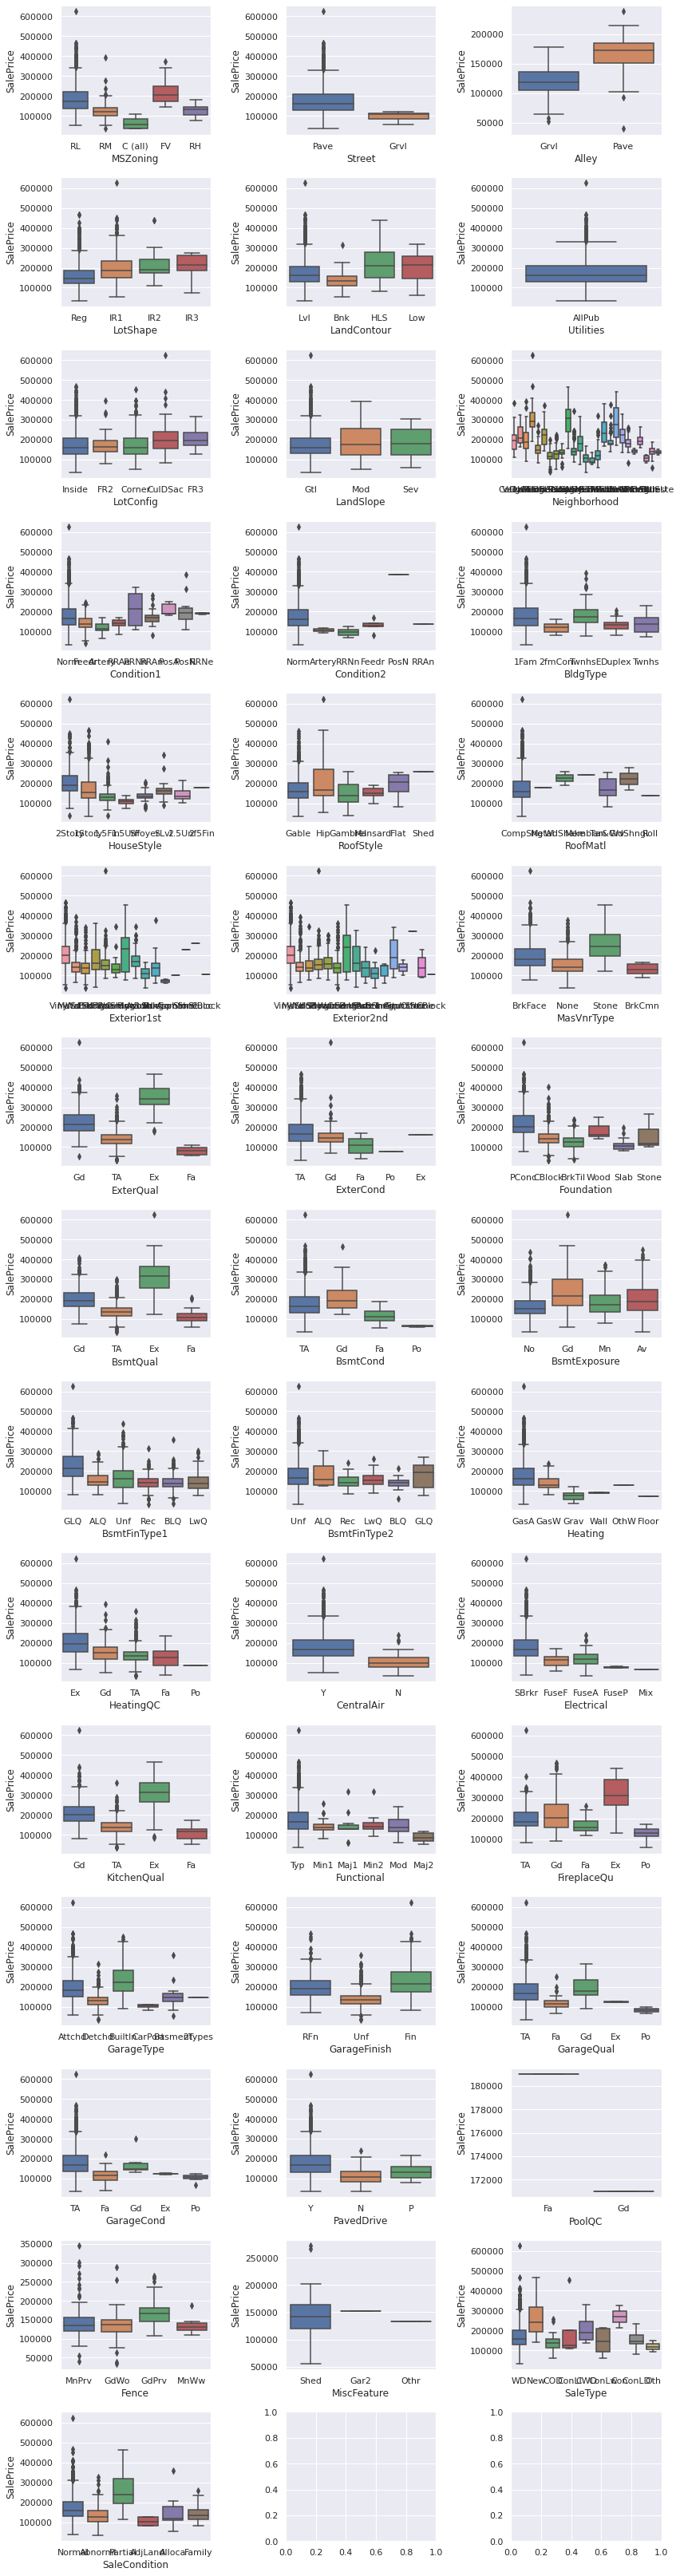

In [111]:
li_cat_feats = list(cat_col)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

# 도화지 위치 먼저 정하고, 그 위치에 따라 몇 번째 열에 대한 그래프 그릴 것인지 정함
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=house_price["SalePrice"], data=house_price, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()

# Neighborhood 변수는 주택 가격 편차가 매우 크므로 영향이 크다고 생각됩니다.
# SaleType 또한 마찬가지입니다.
# 또한 수영장이 있으면 가격이 크게 증가하는 것 같습니다.
# 정리하면 SalePrice에 영향을 많이 끼치는 변수로는 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType' 등이 있습니다.

직접 분리해 놓은 강한 연관 특성, 약한 연관 특성을 범주형과 수치형 각각 분리

In [112]:
num_strong_corr = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars',
                   'FullBath','YearBuilt','YearRemodAdd']

num_weak_corr = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'BsmtFullBath',
                 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

catg_strong_corr = ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
                    'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]



특성 공학- 왜도, 첨도 손보기 및 결측치 제거

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.287364
Kurtosis: 2.555029


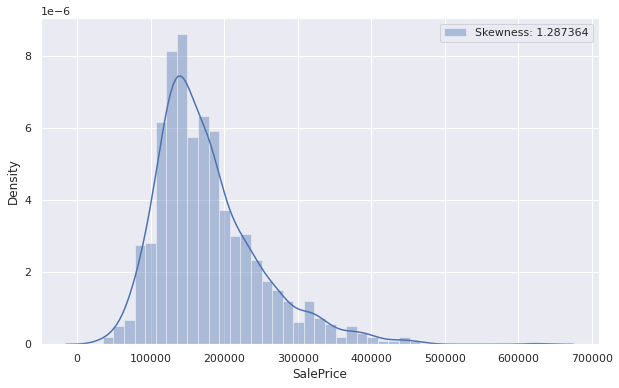

In [113]:
f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(house_price["SalePrice"], color = "b", label="Skewness: {:2f}".format(house_price["SalePrice"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness: %f" % house_price["SalePrice"].skew())
print("Kurtosis: %f" % house_price["SalePrice"].kurt())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.032026
Kurtosis: 0.571897


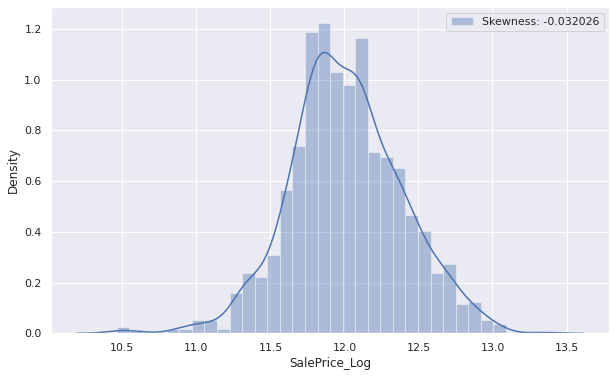

In [114]:
house_price["SalePrice_Log"] = house_price["SalePrice"].map(lambda i:np.log(i) if i>0 else 0)

f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(house_price["SalePrice_Log"], color = "b", label="Skewness: {:2f}".format(house_price["SalePrice_Log"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness: %f" % house_price['SalePrice_Log'].skew())
print("Kurtosis: %f" % house_price['SalePrice_Log'].kurt())

house_price.drop('SalePrice', axis= 1, inplace=True)

# skewness, Kurtosis를 없애주기 위해 로그를 취해줍니다.
# Log변환을 수행한 새로운 feature "SalePrice_Log"를 만들고 전 Feature인 "Saleprice"를 버려줍니다.
# 로그를 취해준 그래프와 수치가 바뀐 모습을 볼 수 있습니다. (정규근사화)

In [115]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

for col in cols_fillna:
    house_price[col].fillna('None',inplace=True)
    final_test_data[col].fillna('None',inplace=True)

In [116]:
total = house_price.isnull().sum().sort_values(ascending=False)
print(house_price.isnull().count())
percent = (house_price.isnull().sum()/house_price.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)


Id               1338
MSSubClass       1338
MSZoning         1338
LotFrontage      1338
LotArea          1338
                 ... 
MoSold           1338
YrSold           1338
SaleType         1338
SaleCondition    1338
SalePrice_Log    1338
Length: 81, dtype: int64


,Total,Percent
LotFrontage,229,0.171151
GarageYrBlt,65,0.048580
MasVnrArea,7,0.005232
Id,0,0.000000
KitchenAbvGr,0,0.000000


나머지 수치형 특성의 결측치는 중위값으로 채움. 평균이 나을지, 중위값이 나을지는 아직 잘 모르겠음

필요 없는 열들을 정했으면, 훈련 세트에서 뿐만 아니라 테스트 세트에서도 삭제

그럼 훈련 세트로 학습시킨 모델의 성능은? StratKFold 방법으로 평가

In [117]:
id_test = final_test_data['Id']

to_drop_num  = num_weak_corr
to_drop_catg = catg_weak_corr

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg 

for df in [house_price, final_test_data]:
    df.drop(cols_to_drop, inplace= True, axis = 1)
    
# SalePrice와의 상관관계가 약한 모든 변수를 삭제합니다.

In [118]:
print(house_price, final_test_data)

     MSZoning Neighborhood Condition2  OverallQual  YearBuilt  YearRemodAdd  \
0          RL      CollgCr       Norm            7       2003          2003   
1          RL      Veenker       Norm            6       1976          1976   
2          RL      CollgCr       Norm            7       2001          2002   
3          RL      Crawfor       Norm            7       1915          1970   
4          RL      NoRidge       Norm            8       2000          2000   
...       ...          ...        ...          ...        ...           ...   
1333       RL      Gilbert       Norm            6       1999          2000   
1334       RL       NWAmes       Norm            6       1978          1988   
1335       RL      Crawfor       Norm            7       1941          2006   
1336       RL        NAmes       Norm            5       1950          1996   
1337       RL      Edwards       Norm            5       1965          1965   

     MasVnrType ExterQual BsmtQual  TotalBsmtSF Cen

In [119]:
total = house_price.isnull().sum().sort_values(ascending=False)

# True=1이므로 isnull().sum()=0이면 결측치가 없다는 뜻
percent = (house_price.isnull().sum()/house_price.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

MSZoning         1338
Neighborhood     1338
Condition2       1338
OverallQual      1338
YearBuilt        1338
YearRemodAdd     1338
MasVnrType       1338
ExterQual        1338
BsmtQual         1338
TotalBsmtSF      1338
CentralAir       1338
Electrical       1338
GrLivArea        1338
FullBath         1338
KitchenQual      1338
GarageCars       1338
SaleType         1338
SalePrice_Log    1338
dtype: int64


,Total,Percent
MSZoning,0,0.0
Neighborhood,0,0.0
SaleType,0,0.0
GarageCars,0,0.0
KitchenQual,0,0.0


범주형 데이터의 수치형 변환

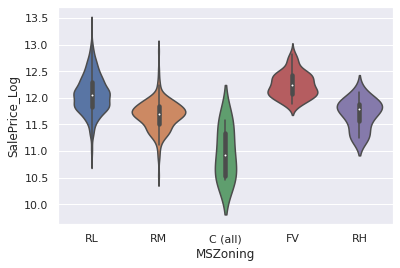

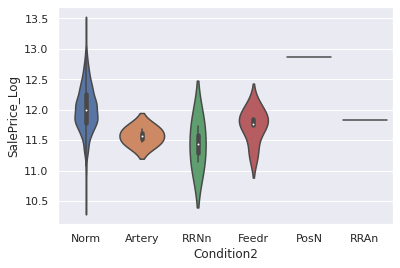

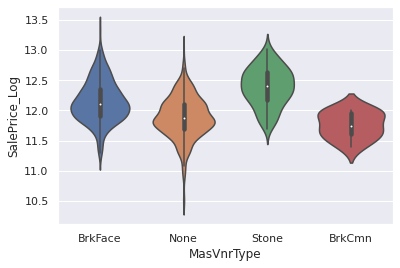

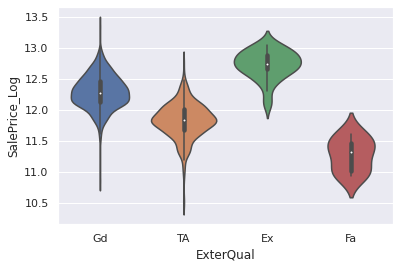

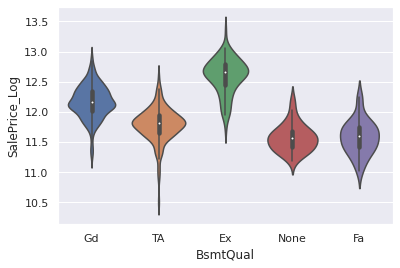

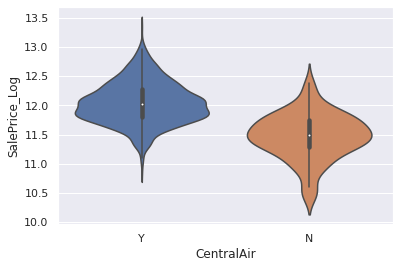

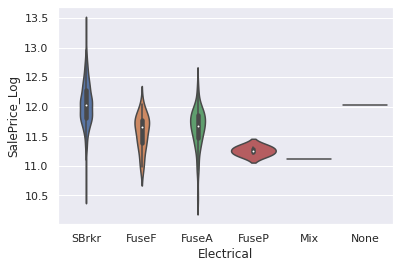

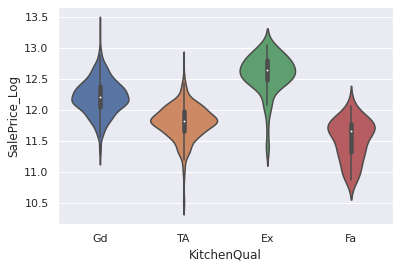

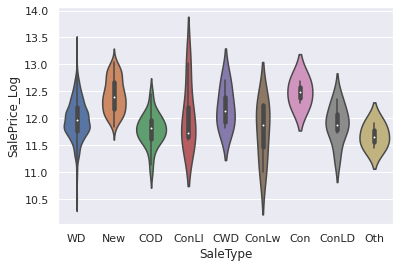

In [120]:
catg_list = catg_strong_corr.copy()
catg_list.remove('Neighborhood')

for catg in catg_list :
    sns.violinplot(x=catg, y=house_price["SalePrice_Log"], data=house_price)
    plt.show()

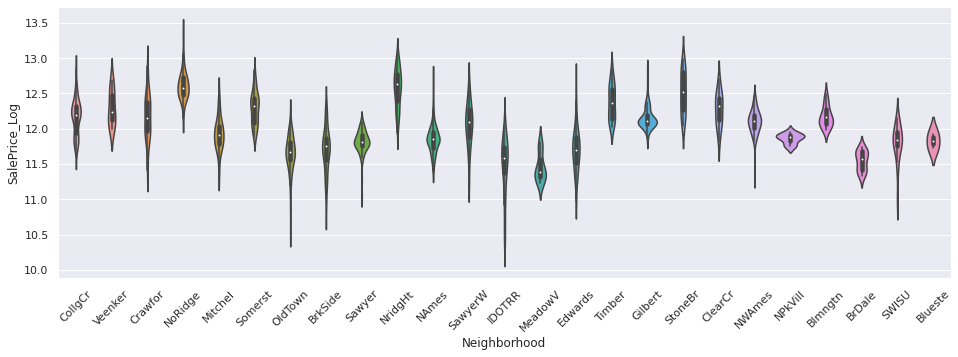

In [121]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=house_price["SalePrice_Log"], data=house_price, ax=ax)
plt.xticks(rotation=45)
plt.show()

# 범주가 가장 많은 Neighborhood 변수도 살펴봅니다.

In [122]:
for catg in catg_list :
    g = house_price.groupby(catg)["SalePrice_Log"].mean()
    print(g)
    
# 각 범주들에 해당되는 SalePrice_Log 평균을 살펴봅니다. 

MSZoning
C (all)    10.960733
FV         12.246616
RH         11.700602
RL         12.069474
RM         11.677434
Name: SalePrice_Log, dtype: float64
Condition2
Artery    11.570036
Feedr     11.734675
Norm      12.012766
PosN      12.860999
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_Log, dtype: float64
MasVnrType
BrkCmn     11.757397
BrkFace    12.150038
None       11.884715
Stone      12.391766
Name: SalePrice_Log, dtype: float64
ExterQual
Ex    12.727937
Fa    11.274881
Gd    12.295102
TA    11.828332
Name: SalePrice_Log, dtype: float64
BsmtQual
Ex      12.595497
Fa      11.585725
Gd      12.170320
None    11.572903
TA      11.791989
Name: SalePrice_Log, dtype: float64
CentralAir
N    11.471479
Y    12.042717
Name: SalePrice_Log, dtype: float64
Electrical
FuseA    11.641350
FuseF    11.565700
FuseP    11.256345
Mix      11.112448
None     12.028739
SBrkr    12.047595
Name: SalePrice_Log, dtype: float64
KitchenQual
Ex    12.582467
Fa    11.514567
Gd    12.209558
TA    11.

In [123]:
g = house_price.groupby('Neighborhood')["SalePrice_Log"].mean()
print(g)

Neighborhood
Blmngtn    12.169416
Blueste    11.826536
BrDale     11.547864
BrkSide    11.704644
ClearCr    12.276068
CollgCr    12.158300
Crawfor    12.167061
Edwards    11.697106
Gilbert    12.155803
IDOTRR     11.473415
MeadowV    11.452586
Mitchel    11.926675
NAmes      11.852498
NPkVill    11.862514
NWAmes     12.101520
NoRidge    12.615801
NridgHt    12.577117
OldTown    11.651224
SWISU      11.803929
Sawyer     11.812720
SawyerW    12.066185
Somerst    12.288747
StoneBr    12.509606
Timber     12.378642
Veenker    12.292494
Name: SalePrice_Log, dtype: float64


In [124]:
house_price

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,GarageCars,SaleType,SalePrice_Log
0,RL,CollgCr,Norm,7,2003,2003,BrkFace,Gd,Gd,856,Y,SBrkr,1710,2,Gd,2,WD,12.247694
1,RL,Veenker,Norm,6,1976,1976,None,TA,Gd,1262,Y,SBrkr,1262,2,TA,2,WD,12.109011
2,RL,CollgCr,Norm,7,2001,2002,BrkFace,Gd,Gd,920,Y,SBrkr,1786,2,Gd,2,WD,12.317167
3,RL,Crawfor,Norm,7,1915,1970,None,TA,TA,756,Y,SBrkr,1717,1,Gd,3,WD,11.849398
4,RL,NoRidge,Norm,8,2000,2000,BrkFace,Gd,Gd,1145,Y,SBrkr,2198,2,Gd,3,WD,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,RL,Gilbert,Norm,6,1999,2000,None,TA,Gd,953,Y,SBrkr,1647,2,TA,2,WD,12.072541
1334,RL,NWAmes,Norm,6,1978,1988,Stone,TA,Gd,1542,Y,SBrkr,2073,2,TA,2,WD,12.254863
1335,RL,Crawfor,Norm,7,1941,2006,None,Ex,TA,1152,Y,SBrkr,2340,2,Gd,1,WD,12.493130
1336,RL,NAmes,Norm,5,1950,1996,None,TA,TA,1078,Y,FuseA,1078,1,Gd,1,WD,11.864462


In [125]:
house_price_feat=house_price.iloc[:,:-1]
house_price_label=house_price.iloc[:,-1]

house_price_feat.shape

(1338, 17)

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

type_num=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

type_cat=Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore')),
])

type_num_col=num_strong_corr.copy()
type_num_col.remove('SalePrice')
type_cat_col=catg_strong_corr


final_pipeline=ColumnTransformer([
    ('type_num', type_num, type_num_col),
    ('type_cat', type_cat, type_cat_col),
])

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

house_price_prep=final_pipeline.fit_transform(house_price_feat)

print(house_price_prep)

  (0, 0)	0.6787196221563341
  (0, 1)	-0.46492857374146995
  (0, 2)	0.5500778242084166
  (0, 3)	0.3358575271141117
  (0, 4)	0.8686999301410454
  (0, 5)	1.032738526686124
  (0, 6)	0.8654952183467494
  (0, 10)	1.0
  (0, 17)	1.0
  (0, 39)	1.0
  (0, 44)	1.0
  (0, 49)	1.0
  (0, 53)	1.0
  (0, 57)	1.0
  (0, 63)	1.0
  (0, 66)	1.0
  (0, 76)	1.0
  (1, 0)	-0.06503701539090155
  (1, 1)	0.5838873629066811
  (1, 2)	-0.4464069902128797
  (1, 3)	0.3358575271141117
  (1, 4)	0.8686999301410454
  (1, 5)	0.11101231142651914
  (1, 6)	-0.43658616498704994
  (1, 10)	1.0
  :	:
  (1336, 39)	1.0
  (1336, 45)	1.0
  (1336, 50)	1.0
  (1336, 55)	1.0
  (1336, 57)	1.0
  (1336, 58)	1.0
  (1336, 66)	1.0
  (1336, 76)	1.0
  (1337, 0)	-0.8087936529381372
  (1337, 1)	0.5683876200005508
  (1337, 2)	-0.45975276897745065
  (1337, 3)	-1.0511096681904604
  (1337, 4)	-1.0274183513087405
  (1337, 5)	-0.2645057762718384
  (1337, 6)	-0.9670637656045237
  (1337, 10)	1.0
  (1337, 19)	1.0
  (1337, 39)	1.0
  (1337, 45)	1.0
  (1337, 49)	

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

params=[{'max_iter': range(100,1000,100), 'alpha':[0.1,0.01,0.001,0.0001], 'tol':[0.1,0.01,0.001,0.0001], 'eta0': [0.1,0.01,0.001]}]

X_train, X_val, y_train, y_val=train_test_split(house_price_prep,house_price_label,test_size=0.2, random_state=42)

sgdr_clf=SGDRegressor(random_state=42)

grid_search=GridSearchCV(sgdr_clf, params, cv=5, verbose=0)

In [129]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END .........alpha=0.1, eta0=0.1, max_iter=100, tol=0.1; total time=   0.0s
[CV] END .........alpha=0.1, eta0=0.1, max_iter=100, tol=0.1; total time=   0.0s
[CV] END .........alpha=0.1, eta0=0.1, max_iter=100, tol=0.1; total time=   0.0s
[CV] END .........alpha=0.1, eta0=0.1, max_iter=100, tol=0.1; total time=   0.0s
[CV] END .........alpha=0.1, eta0=0.1, max_iter=100, tol=0.1; total time=   0.0s
[CV] END ........alpha=0.1, eta0=0.1, max_iter=100, tol=0.01; total time=   0.0s
[CV] END ........alpha=0.1, eta0=0.1, max_iter=100, tol=0.01; total time=   0.0s
[CV] END ........alpha=0.1, eta0=0.1, max_iter=100, tol=0.01; total time=   0.0s
[CV] END ........alpha=0.1, eta0=0.1, max_iter=100, tol=0.01; total time=   0.0s
[CV] END ........alpha=0.1, eta0=0.1, max_iter=100, tol=0.01; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.1, max_iter=100, tol=0.001; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.1, max_iter

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END .....alpha=0.1, eta0=0.001, max_iter=100, tol=0.001; total time=   0.0s
[CV] END ....alpha=0.1, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ....alpha=0.1, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ....alpha=0.1, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ....alpha=0.1, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ....alpha=0.1, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.1, eta0=0.001, max_iter=200, tol=0.01; total time=   0.0s
[CV] END ......alpha=0.1, et

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END ....alpha=0.1, eta0=0.001, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.1, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ......alpha=0.1, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ......alpha=0.1, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ......alpha=0.1, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ......alpha=0.1, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.1, eta0=0.001, max_iter=300, tol=0.001; total time=   0.0s
[CV] END .....alpha=0.1, eta

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END .......alpha=0.1, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END .......alpha=0.1, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.1, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END ......alpha=0.1, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END ......alpha=0.1, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END ......alpha=0.1, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END ......alpha=0.1, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.1, eta0=0.001, max_iter=400, tol=0.001; total time=   0.0s
[CV] END .....alpha=0.1, eta0=0.001, max_iter=400, tol=0.001; total time=   0.0s
[CV] END .....alpha=0.1, eta0=0.001, max_iter=400, tol=0.001; total time=   0.0s
[CV] END .....alpha=0.1, eta0=0.001, max_iter=400, tol=0.001; total time=   0.0s
[CV] END .....alpha=0.1, eta

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END .....alpha=0.01, eta0=0.01, max_iter=200, tol=0.001; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.01, max_iter=200, tol=0.001; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.01, max_iter=200, tol=0.001; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.01, max_iter=200, tol=0.001; total time=   0.0s
[CV] END ....alpha=0.01, eta0=0.01, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END ....alpha=0.01, eta0=0.01, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END ....alpha=0.01, eta0=0.01, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END ....alpha=0.01, eta0=0.01, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END ....alpha=0.01, eta0=0.01, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END .......alpha=0.01, eta0=0.01, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .......alpha=0.01, eta0=0.01, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .......alpha=0.01, eta0=0.01, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .......alpha=0.01, 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END ...alpha=0.01, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.01, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.01, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.01, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.01, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=200, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=200, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, et

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END ...alpha=0.01, eta0=0.001, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.01, eta0=0.001, max_iter=300, tol=0.001; total time=   0.0s
[CV] END ....alpha=0.01, eta

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END ...alpha=0.01, eta0=0.001, max_iter=300, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.01, eta0=0.001, max_iter=300, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.01, eta0=0.001, max_iter=300, tol=0.0001; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, et

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END ...alpha=0.01, eta0=0.001, max_iter=400, tol=0.0001; total time=   0.1s
[CV] END ...alpha=0.01, eta0=0.001, max_iter=400, tol=0.0001; total time=   0.1s
[CV] END ...alpha=0.01, eta0=0.001, max_iter=400, tol=0.0001; total time=   0.1s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=500, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=500, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=500, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, eta0=0.001, max_iter=500, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.01, et

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END ....alpha=0.01, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END ....alpha=0.01, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END ....alpha=0.01, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END ....alpha=0.01, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END ....alpha=0.01, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END ...alpha=0.01, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END ...alpha=0.01, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END ...alpha=0.01, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END ...alpha=0.01, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END ...alpha=0.01, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=600, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, eta0=0.001, max_iter=600, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.01, e

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END ...alpha=0.001, eta0=0.01, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.01, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.01, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.01, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.01, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END ......alpha=0.001, eta0=0.01, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.001, eta0=0.01, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.001, eta0=0.01, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.001, eta0=0.01, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.001, eta0=0.01, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.01, max_iter=300, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.01, max_iter=300, tol=0.01; total time=   0.0s
[CV] END .....alpha=0.001, e

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END ....alpha=0.001, eta0=0.01, max_iter=300, tol=0.001; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.01, max_iter=300, tol=0.001; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.01, max_iter=300, tol=0.001; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.01, max_iter=300, tol=0.001; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.01, max_iter=300, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.01, max_iter=300, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.01, max_iter=300, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.01, max_iter=300, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.01, max_iter=300, tol=0.0001; total time=   0.0s
[CV] END ......alpha=0.001, eta0=0.01, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.001, eta0=0.01, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.001, eta0=0.01, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ......alpha=0.001, 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END ...alpha=0.001, eta0=0.001, max_iter=100, tol=0.001; total time=   0.0s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=200, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.001, et

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END ..alpha=0.001, eta0=0.001, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.001, max_iter=300, tol=0.001; total time=   0.0s
[CV] END ...alpha=0.001, eta

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END ..alpha=0.001, eta0=0.001, max_iter=300, tol=0.0001; total time=   0.1s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=300, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=300, tol=0.0001; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.001, et

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END ..alpha=0.001, eta0=0.001, max_iter=400, tol=0.0001; total time=   0.1s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=400, tol=0.0001; total time=   0.1s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=400, tol=0.0001; total time=   0.1s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=500, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=500, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=500, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.001, eta0=0.001, max_iter=500, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.001, et

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END ...alpha=0.001, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END ...alpha=0.001, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END ..alpha=0.001, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=600, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, eta0=0.001, max_iter=600, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.001, e

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END .....alpha=0.0001, eta0=0.01, max_iter=200, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.0001, eta0=0.01, max_iter=200, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.0001, eta0=0.01, max_iter=200, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.0001, eta0=0.01, max_iter=200, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.0001, eta0=0.01, max_iter=200, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.01, max_iter=200, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.01, max_iter=200, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.01, max_iter=200, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.01, max_iter=200, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.01, max_iter=200, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.01, max_iter=200, tol=0.001; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.01, max_iter=200, tol=0.001; total time=   0.0s
[CV] END ...alpha=0.0001, et

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END ..alpha=0.0001, eta0=0.01, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.0001, eta0=0.01, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END .....alpha=0.0001, eta0=0.01, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.0001, eta0=0.01, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.0001, eta0=0.01, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.0001, eta0=0.01, max_iter=300, tol=0.1; total time=   0.0s
[CV] END .....alpha=0.0001, eta0=0.01, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.01, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.01, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.01, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.01, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.01, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, et

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END ..alpha=0.0001, eta0=0.001, max_iter=100, tol=0.001; total time=   0.0s
[CV] END ..alpha=0.0001, eta0=0.001, max_iter=100, tol=0.001; total time=   0.0s
[CV] END ..alpha=0.0001, eta0=0.001, max_iter=100, tol=0.001; total time=   0.0s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=100, tol=0.0001; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=200, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, e

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END .alpha=0.0001, eta0=0.001, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=200, tol=0.0001; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=300, tol=0.1; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.001, max_iter=300, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, et

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_

[CV] END .alpha=0.0001, eta0=0.001, max_iter=300, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=300, tol=0.0001; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=400, tol=0.1; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.001, max_iter=400, tol=0.01; total time=   0.0s
[CV] END ..alpha=0.0001, eta

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END .alpha=0.0001, eta0=0.001, max_iter=400, tol=0.0001; total time=   0.1s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=400, tol=0.0001; total time=   0.1s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=400, tol=0.0001; total time=   0.1s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=500, tol=0.1; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.001, max_iter=500, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.001, max_iter=500, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.001, max_iter=500, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, eta0=0.001, max_iter=500, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.0001, et

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END ..alpha=0.0001, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END ..alpha=0.0001, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END ..alpha=0.0001, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END ..alpha=0.0001, eta0=0.001, max_iter=500, tol=0.001; total time=   0.0s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END .alpha=0.0001, eta0=0.001, max_iter=500, tol=0.0001; total time=   0.1s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=600, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=600, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, eta0=0.001, max_iter=600, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.0001, e

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42),
             param_grid=[{'alpha': [0.1, 0.01, 0.001, 0.0001],
                          'eta0': [0.1, 0.01, 0.001],
                          'max_iter': range(100, 1000, 100),
                          'tol': [0.1, 0.01, 0.001, 0.0001]}],
             verbose=2)

In [130]:
grid_search.best_params_

{'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 100, 'tol': 0.0001}

수상할 정도로 결과가 좋게 나오는게 과적합이 의심된다.

In [131]:
kf= KFold(n_splits=5)
for train_index, test_index in kf.split(house_price_prep, house_price_label):
  X_train, X_test=house_price_prep[train_index], house_price_prep[test_index]
  y_train, y_test=house_price_label.iloc[train_index], house_price_label.iloc[test_index]



  y_pred=grid_search.predict(X_test)
  print(mean_squared_error(y_test, y_pred))

0.014916920211417413
0.019699882726861108
0.02007166843104483
0.014011508777548552
0.024533646358576425


test 데이터에는 결측치가 일부 존재. 학습 못하는 것을 막기 위해
원핫 인코딩은 handle_unknown='ignore'로 두었다. 

In [59]:
final_test_data[final_test_data['MSZoning']=='None']

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,GarageCars,SaleType
455,None,IDOTRR,Norm,2,1910,1950,None,Fa,None,0.0,N,FuseA,810,1,TA,1.0,ConLD
756,None,IDOTRR,Norm,1,1952,1952,None,Fa,None,0.0,N,FuseA,733,1,Fa,2.0,WD
790,None,IDOTRR,Norm,5,1900,1950,None,TA,TA,686.0,Y,SBrkr,1836,2,TA,1.0,WD
1444,None,Mitchel,Norm,1,1951,1951,None,TA,None,0.0,Y,FuseA,1600,1,TA,1.0,WD


In [83]:
for col in final_test_data.columns:
    if final_test_data[col].isnull().sum()>0:
      msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (final_test_data[col].isnull().sum() / final_test_data[col].shape[0]))
      print(msperc)

column: TotalBsmtSF	 Percent of NaN value: 0.07%
column: GarageCars	 Percent of NaN value: 0.07%


저장

In [132]:
print(final_test_data.shape)

final_test_data_prep=final_pipeline.transform(final_test_data)

final_predict=grid_search.predict(final_test_data_prep)


house_price=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/House Prices/train.csv')
submission=pd.DataFrame()
submission['Id']=id_test
submission['SalePrice']=np.exp(final_predict)
print(submission)
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/House Prices/submission.csv', index=False)

(1459, 17)
        Id      SalePrice
0     1461  113370.418137
1     1462  154381.699533
2     1463  170124.356378
3     1464  177718.249851
4     1465  204226.695696
...    ...            ...
1454  2915   86435.310802
1455  2916   91268.004725
1456  2917  141686.175157
1457  2918  124032.303154
1458  2919  214498.621849

[1459 rows x 2 columns]
